In [28]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import nmc_verification.nmc_vf_base as nvb
import nmc_verification.nmc_vf_method as nvm
import nmc_verification.nmc_vf_product as nvp
import numpy as np
import datetime
import copy
import matplotlib.pyplot as plt
import time
import pandas as pd
import math
import matplotlib as mpl

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
para= {
    "ip_port_file":r"H:\test_data\input\nvb\ip_port.txt",
    "local_binary_dir":"O:/data/mdfs",
    "local_sta_dir": "O:/data/sta",
    "local_grid_dir":"O:/data/grid",
    "max_save_day":7,
    }

最近一周降水空间分布对比

In [3]:
dir_ob = "SURFACE/RAIN24_NATIONAL_08-08/YYYYMMDDHH0000.000"
dir_r = "NWFD_SCMOC/RAIN24/YYMMDDHH.TTT"
now = datetime.datetime.now()
today = datetime.datetime(now.year,now.month,now.day,8,0)
station = nvb.read_station(nvb.station_国家站)

In [4]:
ip,port = nvb.io.read_gds_ip_port(para["ip_port_file"])
nvb.print_gds_file_values_names(ip,port,"SURFACE/RAIN24_NATIONAL_08-08/20200226080000.000")

测站高度
测站级别
降水_24小时


In [5]:
veri_day_count = 7
time1 = today - datetime.timedelta(days = veri_day_count)
ob_list = []
for i in range(veri_day_count):
    time2 = time1 + datetime.timedelta(days = i)
    path = nvb.tool.path_tools.get_path(dir_ob,time2)
    sta = nvp.application.read_stadata(para,path,nvb.gds_element_id.降水_24小时,station)
    ob_list.append(sta)

O:/data/mdfs/SURFACE/RAIN24_NATIONAL_08-08/20200220080000.000
O:/data/mdfs/SURFACE/RAIN24_NATIONAL_08-08/20200221080000.000
O:/data/mdfs/SURFACE/RAIN24_NATIONAL_08-08/20200222080000.000
O:/data/mdfs/SURFACE/RAIN24_NATIONAL_08-08/20200223080000.000
O:/data/mdfs/SURFACE/RAIN24_NATIONAL_08-08/20200224080000.000
O:/data/mdfs/SURFACE/RAIN24_NATIONAL_08-08/20200225080000.000
O:/data/mdfs/SURFACE/RAIN24_NATIONAL_08-08/20200226080000.000


In [6]:
#读取网格预报
dir_gridfore = r"NWFD_SCMOC/RAIN24/YYMMDDHH.TTT"
gridfore_list_list=[]
gf_sta_list = []
for i in range(veri_day_count):
    gf_list = []
    for d in range(3):
        dh = d * 24 + 24
        time2 = time1 + datetime.timedelta(days = i)
        time3 = time2 - datetime.timedelta(hours = dh)
        path = nvb.path_tools.get_path(dir_gridfore,time3,dh)
        grd = nvp.application.read_griddata(para,path)
        nvb.set_griddata_coords(grd,member_list = ["NWFD_SCMOC"])
        sta = nvb.fun.interp_gs_nearest(grd,station)
        gf_list.append(grd)
        gf_sta_list = [sta]
    gridfore_list_list.append(gf_list)

O:/data/mdfs/NWFD_SCMOC/RAIN24/20021908.024
O:/data/grid/NWFD_SCMOC/RAIN24/20200218/20021808.048.nc
O:/data/grid/NWFD_SCMOC/RAIN24/20200217/20021708.072.nc
O:/data/mdfs/NWFD_SCMOC/RAIN24/20022008.024
O:/data/mdfs/NWFD_SCMOC/RAIN24/20021908.048
O:/data/grid/NWFD_SCMOC/RAIN24/20200218/20021808.072.nc
O:/data/mdfs/NWFD_SCMOC/RAIN24/20022108.024
O:/data/mdfs/NWFD_SCMOC/RAIN24/20022008.048
O:/data/mdfs/NWFD_SCMOC/RAIN24/20021908.072
O:/data/mdfs/NWFD_SCMOC/RAIN24/20022208.024
O:/data/mdfs/NWFD_SCMOC/RAIN24/20022108.048
O:/data/mdfs/NWFD_SCMOC/RAIN24/20022008.072
O:/data/mdfs/NWFD_SCMOC/RAIN24/20022308.024
O:/data/mdfs/NWFD_SCMOC/RAIN24/20022208.048
O:/data/mdfs/NWFD_SCMOC/RAIN24/20022108.072
O:/data/mdfs/NWFD_SCMOC/RAIN24/20022408.024
O:/data/mdfs/NWFD_SCMOC/RAIN24/20022308.048
O:/data/mdfs/NWFD_SCMOC/RAIN24/20022208.072
O:/data/mdfs/NWFD_SCMOC/RAIN24/20022508.024
O:/data/mdfs/NWFD_SCMOC/RAIN24/20022408.048
O:/data/mdfs/NWFD_SCMOC/RAIN24/20022308.072


In [7]:
dir_ec = r"ECMWF_HR/APCP/YYMMDDHH.TTT"
ec_list = []

In [8]:
ob_all = pd.concat(ob_list,axis = 0)
ob_all = nvb.between_value_range(ob_all,0,1000)

In [9]:
dat = ob_all.loc[:,"data0"].values
dat_rain = dat[dat>0]
dat_rain.sort()
index = int(dat_rain.size/20)
grade =  round(dat_rain[-index], 1)
print("最近一周强度前5%的降水大于"+str(grade)+"mm")

最近一周强度前5%的降水大于7.1mm


In [10]:
fre_grade = nvp.score(ob_all,nvm.hap_count,group_by = "time",para1 = [grade])
xticks = nvp.base.fun.get_time_str_list(fre_grade[1])

Text(0, 0.5, '相对较强降雨的站次')

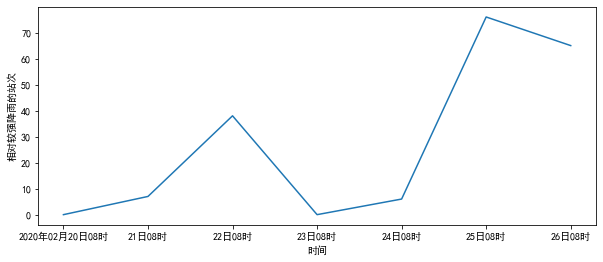

In [11]:
fig = plt.figure(figsize = (10,4))
x = np.arange(veri_day_count)
plt.plot(x,fre_grade[0])
plt.xticks(x,xticks)
plt.xlabel("时间")
plt.ylabel("相对较强降雨的站次")

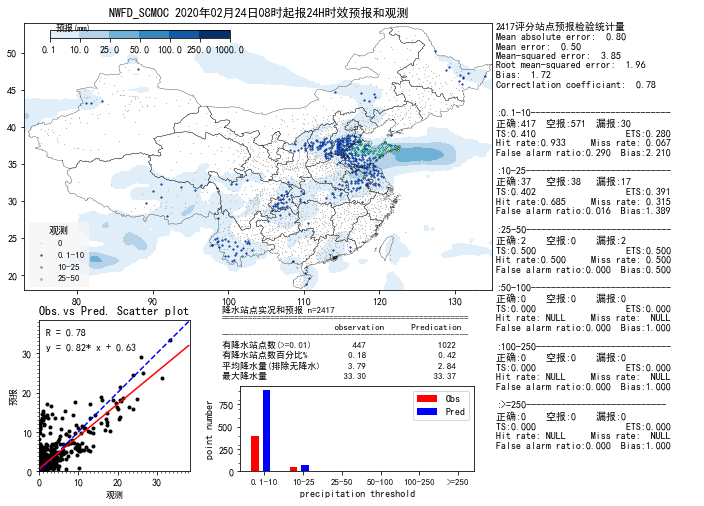

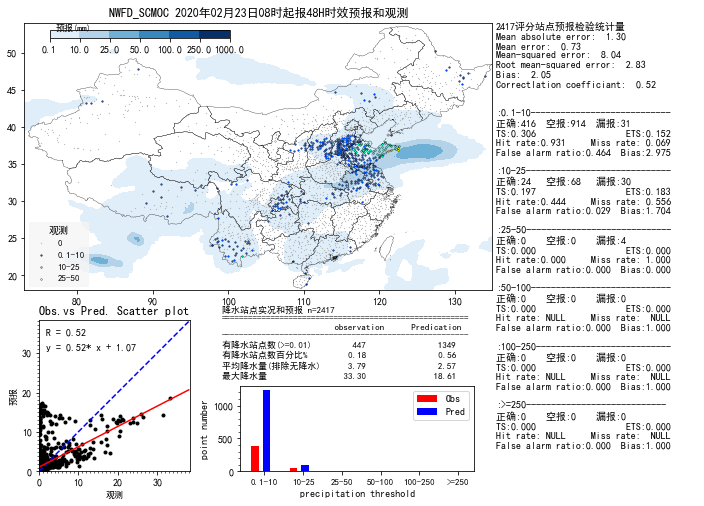

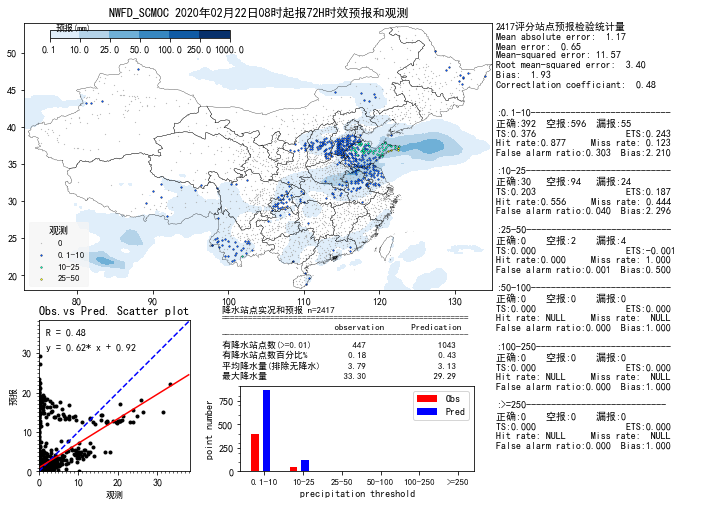

In [35]:
max_index = np.argmax(fre_grade[0])
sta = ob_list[max_index]
grd_list = gridfore_list_list[max_index]
for i in range(3):
    grd = grd_list[i]
    nvp.base.rain_24h_comprehensive_chinaland_sg(sta,grd)